In [412]:
# Import librariesmodel = RandomForestClassifier()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, CatBoostClassifier

pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [413]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')
variable_definations = pd.read_csv('VariableDefinitions.csv')



In [414]:
# m = max(train['population'])
# for i in range(train.shape[0]):
#     train['population'][i] /= m

In [415]:
# m = max(test['population'])
# for i in range(test.shape[0]):
#     train['population'][i] /= m

In [416]:
# a = ['population', 'age', 'Q2', 'Q3', 'Q7', 'Q8', 'Q9', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q20', 'Q24', 'Q25', 'Q26', 'Q27']
# a = ["age", 'Q1', 'Q26', 'Q22', 'Q15', 'Q11', ]
a = ['Q17a']
train = train.drop(a, axis=1)

# print(train[["target","age"]].corr())


In [417]:
test = test.drop(a, axis=1)

In [418]:
# # Category columns
# all_data = train
# cat_cols = ['country', 'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
# num_cols = ['age', 'population']
# # num_cols = []

# # Change columns to their respective datatypes


In [419]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (149810, 35)


In [420]:
# Category columns
cat_cols = ['country','region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age', 'population']

# Change columns to their respective datatypes


In [421]:
# Using Pearson Correlation
# plt.figure(figsize=(12,10))
cor = all_data.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
cor

,Q1,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17b,...,Q4,Q5,Q6,Q7,Q8,Q9,age,owns_mobile,population,target
Q1,1.000000,0.429771,0.409922,0.074401,0.270443,0.400692,0.244820,-0.048293,0.001777,-0.040070,...,0.247363,0.282649,0.454973,0.064327,0.266677,0.315741,-0.136464,0.278038,-0.008827,-0.258509
Q10a,0.429771,1.000000,0.625554,0.106902,0.263328,0.372147,0.276286,-0.031638,0.028090,-0.025462,...,0.624879,0.580396,0.439343,0.167888,0.264936,0.265362,-0.021747,0.199809,0.028356,-0.232440
Q10b,0.409922,0.625554,1.000000,0.112511,0.255636,0.373420,0.263053,-0.042050,0.016969,-0.022250,...,0.583310,0.515509,0.441185,0.198077,0.247866,0.246380,0.043861,0.202470,0.002008,-0.245217
Q11,0.074401,0.106902,0.112511,1.000000,0.227972,0.227028,0.099101,0.080758,0.254678,0.099191,...,0.087390,0.081524,0.085711,0.005592,0.063177,0.039394,0.092999,0.071538,0.021189,-0.137378
Q12,0.270443,0.263328,0.255636,0.227972,1.000000,0.474291,0.192048,0.000637,0.051686,-0.043543,...,0.171410,0.155635,0.277970,0.076544,0.156209,0.132822,-0.159184,0.118619,0.013531,-0.233556
Q13a,0.400692,0.372147,0.373420,0.227028,0.474291,1.000000,0.239262,-0.020562,0.076013,-0.024026,...,0.255525,0.245702,0.360496,0.114586,0.252517,0.208305,-0.075312,0.171363,-0.008180,-0.269330
Q14,0.244820,0.276286,0.263053,0.099101,0.192048,0.239262,1.000000,0.080042,0.154265,0.033467,...,0.202488,0.201896,0.280138,0.080665,0.124313,0.123262,-0.037026,0.119724,0.030211,-0.138913
Q15,-0.048293,-0.031638,-0.042050,0.080758,0.000637,-0.020562,0.080042,1.000000,0.210862,0.335130,...,-0.030147,-0.033656,-0.024145,-0.015613,-0.041624,-0.037163,0.049149,-0.011709,0.003054,0.069486
Q16,0.001777,0.028090,0.016969,0.254678,0.051686,0.076013,0.154265,0.210862,1.000000,0.206247,...,0.021383,0.003877,0.031361,-0.007520,-0.009955,-0.019012,0.063751,0.017735,0.014041,-0.035148
Q17b,-0.040070,-0.025462,-0.022250,0.099191,-0.043543,-0.024026,0.033467,0.335130,0.206247,1.000000,...,-0.007404,-0.011021,-0.061369,-0.005362,-0.020333,-0.020002,0.144363,0.018475,-0.039410,0.044887


In [422]:
# col = cat_cols + num_cols + ['target']
# col.remove('country')
# col.remove('region')
# tot = []
# # print(len(col))
# for i in col:
#     cor_target = abs(cor[i])
#     c = 0
#     for j in cor_target:
# #         print(c)
#         t = col[c]
#         if j == 1:
#             print(j, t, i)
#         if i != t:
#             tot.append((j, i, t))
#         c += 1
# tot.sort(reverse=True)
# print(tot[:16])

In [423]:
# new_col = ["Q7", "Q3", "Q23", "Q2"]
# col = cat_cols + num_cols + ['target']
# col.remove('country')
# col.remove('region')
# for i in new_col:
#     tot = []
#     cor_target = abs(cor[i])
#     c = 0
#     for j in cor_target:
# #         print(c)
#         t = col[c]
#         if i != t:
#             tot.append((j, i, t))
#         c += 1
#     tot.sort(reverse=True)
#     print(tot[:3])

In [424]:
#Correlation with output variable
cor_target = abs(cor["Q7"])
# # #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.1]
# relevant_features
cor_target

Q1             0.064327
Q10a           0.167888
Q10b           0.198077
Q11            0.005592
Q12            0.076544
Q13a           0.114586
Q14            0.080665
Q15            0.015613
Q16            0.007520
Q17b           0.005362
Q19            0.006950
Q2             0.099880
Q20            0.012114
Q21            0.109546
Q22            0.105551
Q23            0.007737
Q24            0.008489
Q25            0.021023
Q26            0.062891
Q27            0.075981
Q28            0.154407
Q3             0.181211
Q4             0.142254
Q5             0.136853
Q6                  NaN
Q7             1.000000
Q8             0.148381
Q9             0.149510
age            0.006115
owns_mobile    0.089752
population     0.001462
target         0.086263
Name: Q7, dtype: float64

In [425]:
all_data[cat_cols] = all_data[cat_cols].astype('category')

In [426]:
# # Q10b
# # cols = tot[:16]
# cols = [ ('Q7', 'Q10a'), ('Q3', 'Q1'), ('Q2', 'Q19'), ('Q23', 'owns_mobile')]
# l = all_data.shape[0]
# for  b, c in cols:
#     for i in range(l):
#         if all_data[b][i] == 'nan' and not all_data[c][i] == 'nan' :
#             all_data[b][i] = all_data[c][i]
# #         if all_data[c][i] == 'nan' and not all_data[b][i] == 'nan' :
# #             all_data[c][i] = all_data[b][i]

In [427]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 35 columns):
ID             149810 non-null object
Q1             149810 non-null category
Q10a           149810 non-null category
Q10b           149810 non-null category
Q11            149810 non-null category
Q12            149810 non-null category
Q13a           149810 non-null category
Q14            149810 non-null category
Q15            149810 non-null category
Q16            149810 non-null category
Q17b           149810 non-null category
Q19            115206 non-null category
Q2             68137 non-null category
Q20            115206 non-null category
Q21            149810 non-null category
Q22            149810 non-null category
Q23            53580 non-null category
Q24            149810 non-null category
Q25            149810 non-null category
Q26            115206 non-null category
Q27            83535 non-null category
Q28            105372 non-null category
Q3            

In [428]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  elif col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mean())

# Confirm that there aren't any missing values

In [429]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data[cat_cols] = all_data[cat_cols].astype('category')
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,ID,age,population,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,...,Q7_3.0,Q7_4.0,Q8_1.0,Q8_2.0,Q8_3.0,Q8_4.0,Q9_1.0,Q9_2.0,Q9_3.0,Q9_4.0
0,ID_0000020532,66.0,25550170.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,ID_0000075765,44.0,4591023.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,29.0,25550170.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,ID_0000144505,44.0,30491168.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,ID_0000214184,36.0,93002320.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [430]:
# train = all_data

In [431]:
# # Category columns
# all_data = test
# cat_cols = ['country', 'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
# num_cols = ['age', 'population']

# # num_cols = []
# # Change columns to their respective datatypes
# all_data[cat_cols] = all_data[cat_cols].astype('category')

In [432]:
# # Fill in missing values
# # For cat cols and date cols fill in with mode and for num cols fill in with 9999
# for col in all_data.columns:
#   if col in cat_cols:
#     all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
#   elif col in num_cols:
#     all_data[col] = all_data[col].fillna(all_data[col].mean())

# # Confirm that there aren't any missing values

In [433]:
# # Use one hot encoding to turn categorical features to numerical features
# # Encode categorical features
# all_data = pd.get_dummies(data = all_data, columns = cat_cols)
# all_data.head()

In [434]:
# test = all_data

In [435]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

In [436]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['ID', 'target'])
# X = train[main_cols]
# y = train.target.astype(int)
X = train_df[main_cols]
y = train_df.target.astype(int)
# Split data into train and test sets
# ans = []
# for i in range(80, 110):
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=80)

#     # Train model
#     model = CatBoostRegressor(verbose=0, random_state=i)
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
#     acc = roc_auc_score(y_test, y_pred)
#     ans.append((acc, i))
#     print(acc, i)
# ans.sort()
# print(ans)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=80)

model = CatBoostRegressor(verbose=0)
model.fit(X, y)

# # Make predictions
y_pred = model.predict(X_test)
print(f'AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')


AUC score on the X_test is: 0.8379176693830895



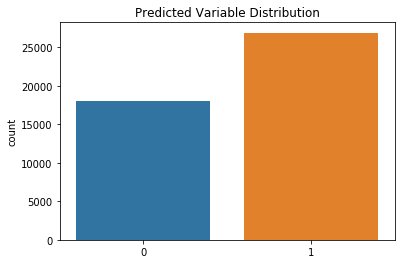

In [437]:
# Make prediction on the test set
# test = test[main_cols]
test_df = test_df[main_cols]
# predictions1 = model.predict(test_df)
# predictions2 = model2.predict(test_df)

# predictions  = (predictions1 + predictions2) / 2.0
predictions = model.predict(test_df)
# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [438]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline4.csv', index = False)
sub_file.head() 
# i dont know what i am doing, heeeeeeeeeelp

,ID,target
0,ID_0000005111,0.811906
1,ID_0000389416,0.262083
2,ID_0000634789,0.504492
3,ID_0000778100,1.006620
4,ID_0001123210,0.571105
